This notebook demonstrates how to enable the local pytorch implentation of moondream to work.

We need to download the model from the huggingface hub, save to a safetensors, and load it into the pytorch model here. This allows us to make more flexible changes to things like the kv cache later on.

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image

hf_model = AutoModelForCausalLM.from_pretrained(
    "vikhyatk/moondream2",
    revision="2025-06-21",
    trust_remote_code=True,
    device_map={"": "mps"}  # ...or 'mps', on Apple Silicon
)


/Users/noahkasmanoff/anaconda3/envs/drh-reader/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from safetensors.torch import save_file
hf_model.model._setup_caches()
save_file(
    hf_model.model.state_dict(),
    "model.safetensors",
)

# this safetensors is the one which will work.

In [ ]:
# do we know it  works?

from moondream import MoondreamModel, MoondreamConfig
from safetensors.torch import load_file
from PIL import Image


In [6]:
model = MoondreamModel(config=MoondreamConfig)
safetensors_path = "model.safetensors"
state_dict = load_file(safetensors_path)
model.load_state_dict(state_dict)
model.to("mps")

MoondreamModel(
  (vision): ModuleDict(
    (patch_emb): Linear(in_features=588, out_features=1152, bias=True)
    (blocks): ModuleList(
      (0-26): 27 x ModuleDict(
        (ln1): LayerNorm((1152,), eps=1e-05, elementwise_affine=True)
        (attn): ModuleDict(
          (qkv): Linear(in_features=1152, out_features=3456, bias=True)
          (proj): Linear(in_features=1152, out_features=1152, bias=True)
        )
        (ln2): LayerNorm((1152,), eps=1e-05, elementwise_affine=True)
        (mlp): ModuleDict(
          (fc1): Linear(in_features=1152, out_features=4304, bias=True)
          (fc2): Linear(in_features=4304, out_features=1152, bias=True)
        )
      )
    )
    (post_ln): LayerNorm((1152,), eps=1e-05, elementwise_affine=True)
    (proj_mlp): ModuleDict(
      (fc1): Linear(in_features=2304, out_features=8192, bias=True)
      (fc2): Linear(in_features=8192, out_features=2048, bias=True)
    )
  )
  (text): ModuleDict(
    (blocks): ModuleList(
      (0-23): 24 x Mod

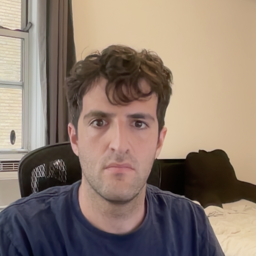

In [14]:

image = Image.open("image.jpg")

image = image.resize((256, 256))
image

In [15]:
print("\nShort caption:")
print(model.caption(image, length="short"))



Short caption:
{'caption': 'A young man with curly hair and a blue t-shirt sits in a cozy bedroom, gazing at the camera with a serious expression.'}


In [ ]:
# This works! Now we can try the GPRO fine tuning.